# <font color='DodgerBlue'>Relacion Carga-Masa de un electron</font> 

In [25]:
import pandas as pd
import statistics
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
%pylab inline


import sys
sys.path.append('/home/ramsus/Programming/NicolasPersonal/University/Herramientas')
import MinimosCuadradosOrdinarios as mc
import MetodosBasicos as mb

Populating the interactive namespace from numpy and matplotlib


/home/ramsus/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
Incert = pd.read_csv("Incertidumbres.csv")
DRadios = pd.read_csv("DataI(A)_V(V)_R_n.csv")
Cal1 = pd.read_csv("Intento1.csv")
Cal2 = pd.read_csv("Intento2.csv")

In [3]:
Incert

,Incertidumbre,Val
0,I(A),0.10
1,B(mT),0.01
2,V(V),1.00


In [4]:
Cal1["B(T)"]= Cal1["B(mT)"]*(1e-3)
Cal2["B(T)"]= Cal2["B(mT)"]*(1e-3)

Cal1

,I(A),B(mT),B(T)
0,0.0,0.09,0.00009
1,0.5,0.48,0.00048
2,1.0,0.87,0.00087
3,1.5,1.19,0.00119
4,2.0,1.48,0.00148
5,2.5,1.88,0.00188
6,3.0,2.21,0.00221
7,3.5,2.52,0.00252


No handles with labels found to put in legend.


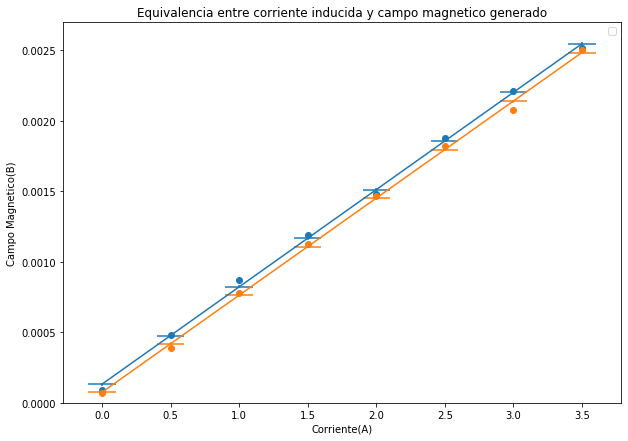

P1: 0.0006900000000000001X+ 0.00013249999999999986
P2: 0.0006885714285714286X+ 7.499999999999993e-05


In [5]:
fig = plt.figure(figsize =  (10,7))

xerr1 = [0.1]*len(Cal1["I(A)"])
yerr1 = [0.01e-3]*len(Cal1.index)
plt.scatter(Cal1["I(A)"], Cal1["B(T)"])
B1 = mc.MinCua(Cal1["I(A)"],  Cal1["B(T)"] )
plt.errorbar(Cal1["I(A)"], B1[0]+B1[1]*Cal1["I(A)"], xerr= xerr1, yerr = yerr1 )

xerr2 = [0.1]*len(Cal2["I(A)"])
yerr2 = [0.01e-3]*len(Cal2.index)
plt.scatter(Cal2["I(A)"], Cal2["B(T)"])
B2 = mc.MinCua(Cal2["I(A)"],  Cal2["B(T)"] )
plt.errorbar(Cal2["I(A)"], B2[0]+B2[1]*Cal2["I(A)"], xerr= xerr2, yerr = yerr2)

plt.title("Equivalencia entre corriente inducida y campo magnetico generado")
plt.xlabel("Corriente(A)")
plt.ylabel("Campo Magnetico(B)")
plt.ylim(0, 0.0027)
plt.legend()
#plt.savefig("calibracion.png")
plt.show()
print(f"P1: {B1[1]}X+ {B1[0]}")
print(f"P2: {B2[1]}X+ {B2[0]}")

In [6]:
def B(I):
    return np.mean([B1[1],B2[1]])*I + np.mean([B1[0], B2[0]])

In [7]:
DRadios

,0.05_V,0.05_I,0.04_V,0.04_I,0.03_V,0.03_I,0.02_V,0.02_I
0,149,0.98,148,1.28,148,1.71,151,2.97
1,178,1.11,177,1.36,180,1.94,180,3.16
2,202,1.18,204,1.50,198,2.10,193,3.26
3,229,1.37,236,1.67,233,2.33,239,3.37
4,250,1.47,262,1.80,255,2.27,263,3.54
5,312,1.60,298,2.01,299,2.67,314,3.73
6,328,1.60,330,2.10,327,2.90,335,3.89


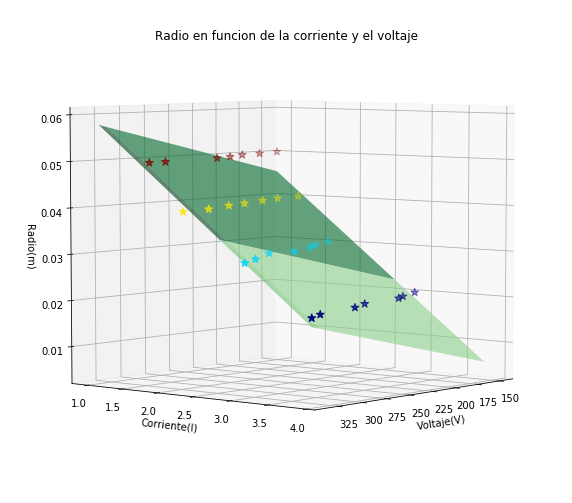

r = 6.60839215874934e-05V + -0.013635123472401207I + 0.04902237759639397


In [8]:
#ax = plt.axes(projection='3d')
fig = plt.figure(figsize =  (10,9))
ax = fig.add_subplot(111, projection='3d', )

V = np.array([ DRadios[column] for column in DRadios if column[-1] =='V']).ravel()
I = np.array([ DRadios[column] for column in DRadios if column[-1] =='I']).ravel()
R = np.array([0.05]*7 + [0.04]*7 + [0.03]*7 + [0.02]*7)
zdata = R
xdata = V
ydata = I

V1 = mc.MinCua2(V, I, R)


def f(V, I):
    return V1[1]*V + V1[2]*I + V1[0]
X, Y = np.meshgrid(V, I)
Z = f(X, Y)
#ax.contour3D(X, Y, Z, 30)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.plot_surface( X, Y, Z,alpha=0.6,linewidth=0,antialiased=True,vmin=0,rstride=19,cstride=20, cmap = cm.Greens)
ax.scatter3D(xdata, ydata, zdata, c=zdata, s=70, marker = '*', cmap =cm.jet)

ax.set_xlabel('Voltaje(V)')
ax.set_ylabel('Corriente(I)')
ax.set_zlabel('Radio(m)')
ax.set_title("Radio en funcion de la corriente y el voltaje")
ax.view_init(5, 40)
#plt.savefig("RadioMulti.png")
plt.show()

print(f"r = {V1[1]}V + {V1[2]}I + {V1[0]}")

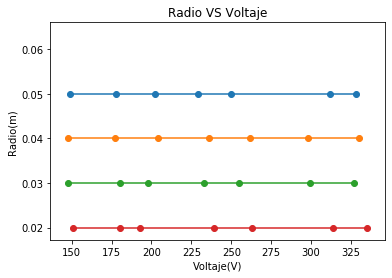

In [9]:
plt.scatter(DRadios["0.05_V"],[0.05]*7)
plt.scatter(DRadios["0.04_V"],[0.04]*7 )
plt.scatter( DRadios["0.03_V"],[0.03]*7)
plt.scatter(DRadios["0.02_V"],[0.02]*7 )

plt.plot( DRadios["0.05_V"],[0.05]*7)
plt.plot(DRadios["0.04_V"],[0.04]*7 )
plt.plot(DRadios["0.03_V"],[0.03]*7 )
plt.plot(DRadios["0.02_V"],[0.02]*7 )
plt.title("Radio VS Voltaje")
plt.xlabel("Voltaje(V)")
plt.ylabel("Radio(m)")
plt.savefig("RvsV.png")
plt.show()

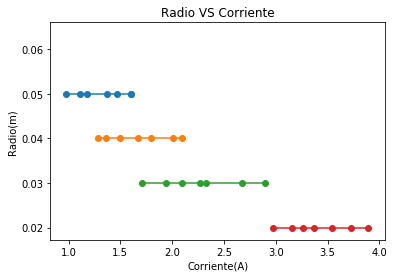

In [10]:
plt.scatter(DRadios["0.05_I"],[0.05]*7)
plt.scatter(DRadios["0.04_I"],[0.04]*7 )
plt.scatter( DRadios["0.03_I"],[0.03]*7)
plt.scatter(DRadios["0.02_I"],[0.02]*7 )

plt.plot(DRadios["0.05_I"],[0.05]*7)
plt.plot(DRadios["0.04_I"],[0.04]*7 )
plt.plot(DRadios["0.03_I"],[0.03]*7 )
plt.plot(DRadios["0.02_I"],[0.02]*7 )
plt.title("Radio VS Corriente")
plt.xlabel("Corriente(A)")
plt.ylabel("Radio(m)")
plt.savefig("RvsI.png")
plt.show()

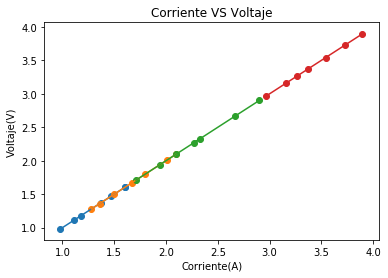

In [11]:
plt.scatter(DRadios["0.05_I"], DRadios["0.05_I"])
plt.scatter(DRadios["0.04_I"], DRadios["0.04_I"])
plt.scatter(DRadios["0.03_I"], DRadios["0.03_I"])
plt.scatter(DRadios["0.02_I"], DRadios["0.02_I"])

plt.plot(DRadios["0.05_I"], DRadios["0.05_I"])
plt.plot(DRadios["0.04_I"], DRadios["0.04_I"])
plt.plot(DRadios["0.03_I"], DRadios["0.03_I"])
plt.plot(DRadios["0.02_I"], DRadios["0.02_I"])
plt.title("Corriente VS Voltaje")
plt.ylabel("Voltaje(V)")
plt.xlabel("Corriente(A)")
plt.savefig("IvsV.png")
plt.show()

In [27]:
c_m = (2*np.array(X))/( (np.array(Z)**2)* (np.array(B(Y))**2) ) 
print(np.log10(mean(c_m)) , mean(c_m))
#print(c_m)

11.321411820300781 209609914246.9486


In [35]:
print( statistics.stdev(c_m.ravel())  , mean(c_m.ravel()) )
#print(c_m.ravel())

107412518389.86475 209609914246.9486
